In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

Definicja stałych

In [ ]:
N = 8.2e9
beta, gamma = 1, 0.05 # for SIR zmieniony parametr beta
mu, a = 4.5e-5, 0.09 # for SEIR

zad2 = False
zad3 = False
zadzal = False

Implementacja modelu SIR

In [3]:
def SIR(t: float, z: tuple[float, float, float], bn) -> tuple[float, float, float]:
    if zad2 and t>= 15:
        current_beta = beta /2
    elif zad3 and t>= 15:
        current_beta = bn
    else:
        current_beta = beta
        
    S, I, R = z
    dS = -(current_beta / N) * I * S
    dI = (current_beta / N) * I * S - gamma * I
    dR = gamma * I
    return [dS, dI, dR]

Implementacja modelu SEIR

In [ ]:
def SEIR(t: float, z: tuple[float, float, float, float], bn) -> tuple[float, float, float, float]:
    if zad2 and t>= 15:
        current_beta = beta /2
    elif zad3 and t>= 15:
        current_beta = bn
    elif zadzal:
        current_beta = bn
    else:
        current_beta = beta
    
    S, E, I, R = z
    dS = mu * N - mu * S - (current_beta / N) * I * S
    dE = (current_beta / N) * I * S - (mu + a) * E
    dI = a * E - (gamma + mu) * I
    dR = gamma * I - mu * R
    return [dS, dE, dI, dR]

Rozwiązanie układu równań + wykresy

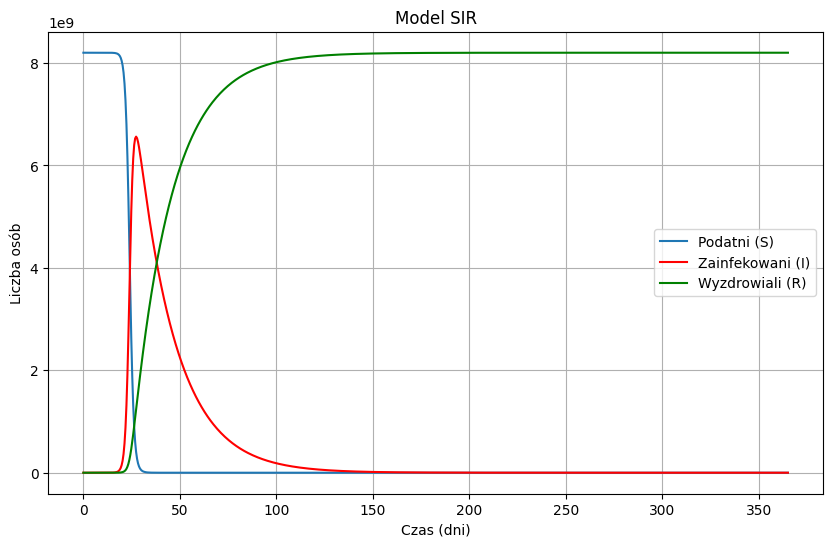

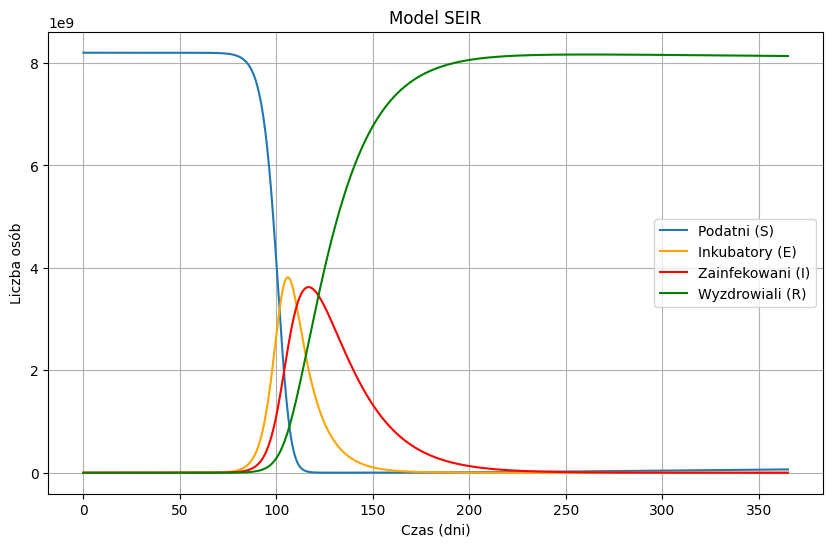

In [5]:
# SIR
sol_sir = solve_ivp(SIR, [0, 365], [N - 1, 1, 0], args=(0,), max_step=0.5)

# SEIR
sol_seir = solve_ivp(SEIR, [0, 365], [N - 1, 1, 0, 0], args=(0,), max_step=0.5)

plt.figure(figsize=(10, 6))
plt.plot(sol_sir.t, sol_sir.y[0], label='Podatni (S)')
plt.plot(sol_sir.t, sol_sir.y[1], label='Zainfekowani (I)', color='red')
plt.plot(sol_sir.t, sol_sir.y[2], label='Wyzdrowiali (R)', color='green')
plt.title("Model SIR")
plt.xlabel("Czas (dni)")
plt.ylabel("Liczba osób")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(sol_seir.t, sol_seir.y[0], label='Podatni (S)')
plt.plot(sol_seir.t, sol_seir.y[1], label='Inkubatory (E)', color='orange')
plt.plot(sol_seir.t, sol_seir.y[2], label='Zainfekowani (I)', color='red')
plt.plot(sol_seir.t, sol_seir.y[3], label='Wyzdrowiali (R)', color='green')
plt.title("Model SEIR")
plt.xlabel("Czas (dni)")
plt.ylabel("Liczba osób")
plt.legend()
plt.grid(True)


Redukcja parametru beta o polowa od 60 dnia

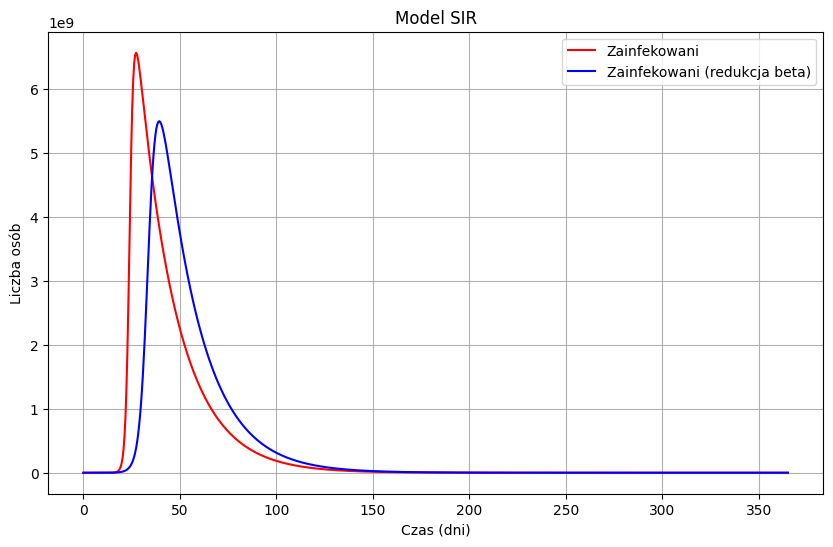

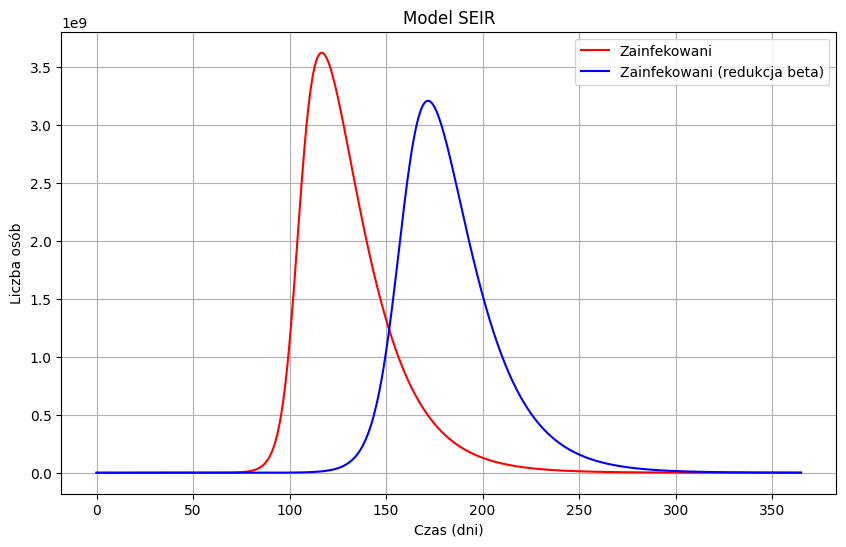

In [6]:
zad2 = True
# SIR
sol_sir_2 = solve_ivp(SIR, [0, 365], [N - 1, 1, 0], args=(0,), max_step=0.5)

# SEIR
sol_seir_2 = solve_ivp(SEIR, [0, 365], [N - 1, 1, 0, 0], args=(0,), max_step=0.5)

plt.figure(figsize=(10, 6))
plt.plot(sol_sir.t, sol_sir.y[1], label='Zainfekowani', color='red')
plt.plot(sol_sir.t, sol_sir_2.y[1], label='Zainfekowani (redukcja beta)', color='blue')
plt.title("Model SIR")
plt.xlabel("Czas (dni)")
plt.ylabel("Liczba osób")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(sol_seir.t, sol_seir.y[2], label='Zainfekowani', color='red')
plt.plot(sol_seir.t, sol_seir_2.y[2], label='Zainfekowani (redukcja beta)', color='blue')
plt.title("Model SEIR")
plt.xlabel("Czas (dni)")
plt.ylabel("Liczba osób")
plt.legend()
plt.grid(True)

zad2 = False


Szacowanie redukcji beta 

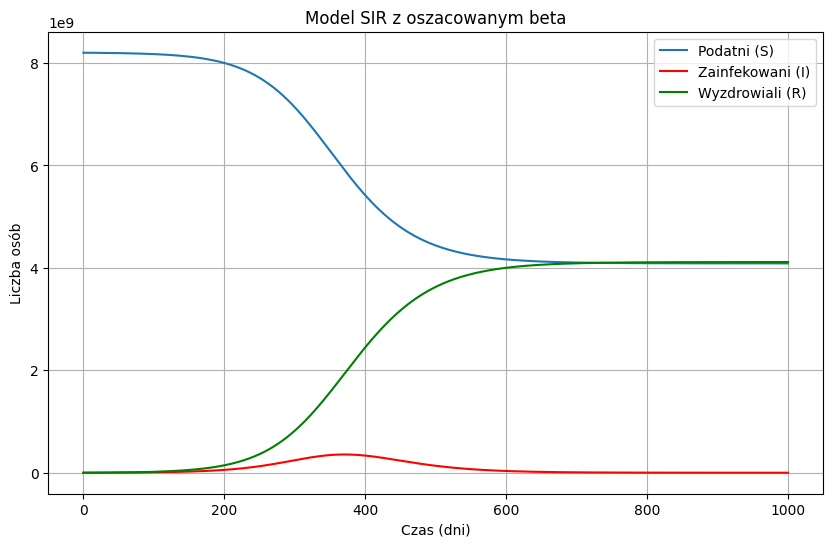

In [13]:
zad3 = True
results = []

for db in np.linspace(0.01 * beta, 0.99 * beta, 100):
    bn = beta - db
    sol = solve_ivp(SIR, [0, 1000], [N-1, 1, 0], args=(bn,), max_step=0.5)
    i_max = max(sol.y[1])
    results.append({"db": db, "i_max_perc": i_max / N * 100})
    
best_db = max([r for r in results if r['i_max_perc'] <= 5], key=lambda x: x['i_max_perc'])['db']

sol_sir_best_db = solve_ivp(SIR, [0, 1000], [N-1, 1, 0], args=(beta-best_db,), max_step=0.5)

plt.figure(figsize=(10, 6))
plt.plot(sol_sir_best_db.t, sol_sir_best_db.y[0], label='Podatni (S)')
plt.plot(sol_sir_best_db.t, sol_sir_best_db.y[1], label='Zainfekowani (I)', color='red')
plt.plot(sol_sir_best_db.t, sol_sir_best_db.y[2], label='Wyzdrowiali (R)', color='green')
plt.title("Model SIR z oszacowanym beta")
plt.xlabel("Czas (dni)")
plt.ylabel("Liczba osób")
plt.legend()
plt.grid(True)
    
zad3 = False

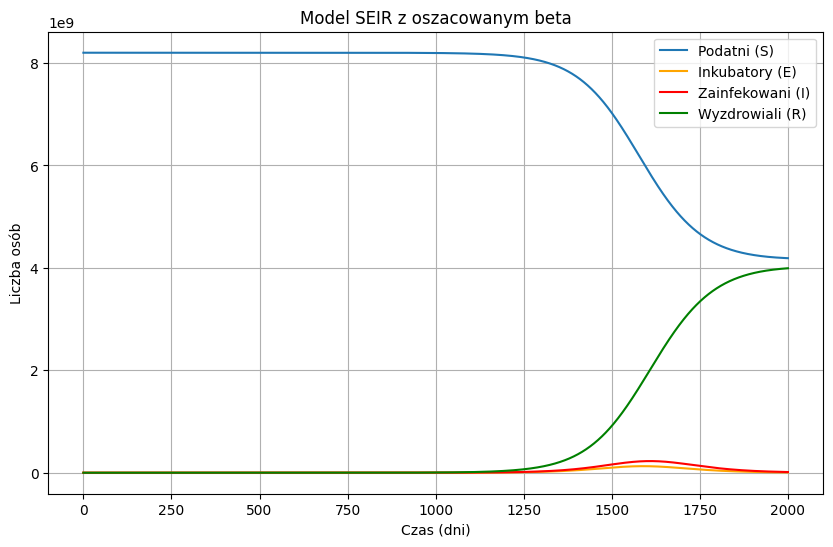

In [15]:
zad3 = True
results = []

for db in np.linspace(0.01 * beta, 0.99 * beta, 100):
    bn = beta - db
    sol = solve_ivp(SEIR, [0, 2000], [N-1, 1, 0, 0], args=(bn,), max_step=0.5)
    i_max = max(sol.y[2])
    results.append({"db": db, "i_max_perc": i_max / N * 100})
    
best_db = max([r for r in results if r['i_max_perc'] <= 5], key=lambda x: x['i_max_perc'])['db']

sol_seir_best_db = solve_ivp(SEIR, [0, 2000], [N-1, 1, 0, 0], args=(beta-best_db,), max_step=0.5)

plt.figure(figsize=(10, 6))
plt.plot(sol_seir_best_db.t, sol_seir_best_db.y[0], label='Podatni (S)')
plt.plot(sol_seir_best_db.t, sol_seir_best_db.y[1], label='Inkubatory (E)', color='orange')
plt.plot(sol_seir_best_db.t, sol_seir_best_db.y[2], label='Zainfekowani (I)', color='red')
plt.plot(sol_seir_best_db.t, sol_seir_best_db.y[3], label='Wyzdrowiali (R)', color='green')
plt.title("Model SEIR z oszacowanym beta")
plt.xlabel("Czas (dni)")
plt.ylabel("Liczba osób")
plt.legend()
plt.grid(True)
    
zad3 = False

Wypisanie zarazonych COVID

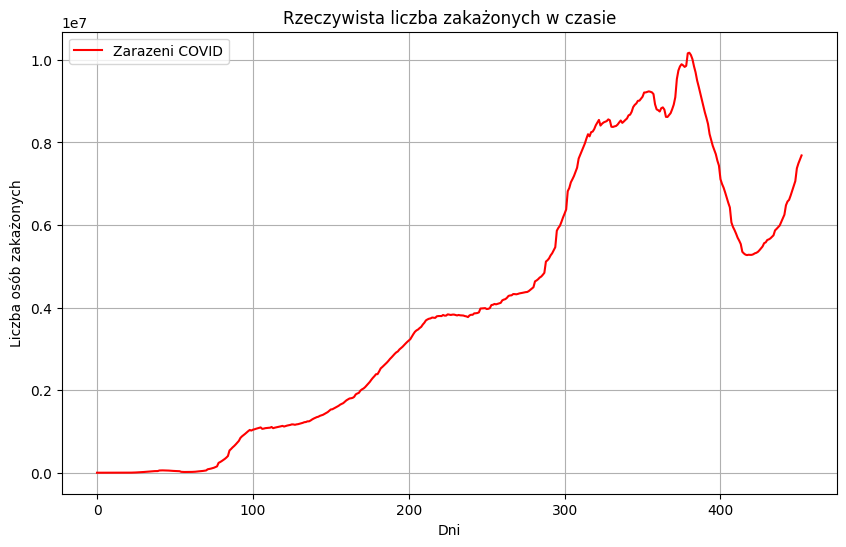

In [18]:
df = pd.read_csv("covid_currently_infected.csv")

col_date = df.columns[0]
col_infected = df.columns[1]

df[col_date] = pd.to_datetime(df[col_date])

start_date = df[col_date].min()
df["Dni_od_poczatku"] = (df[col_date] - start_date).dt.days

plt.figure(figsize=(10, 6))
plt.plot(df['Dni_od_poczatku'], df[col_infected], label="Zarazeni COVID", color="red")
plt.title("Rzeczywista liczba zakażonych w czasie")
plt.xlabel("Dni")
plt.ylabel("Liczba osób zakażonych")
plt.legend()
plt.grid(True)

Znalezenie parametrow zeby SEIR bylo podobne

In [ ]:
zadzal = True

max_real_I = df[col_infected].max()

gamma = 1/14 # 2 tygodnie

results = []

min_error = float('inf')
best_beta = 0

for beta in np.linspace(0.01, 1.0, 100):
    sol = solve_ivp(SEIR, [0, 1000], [N-1, 1, 0, 0], args=(beta,), max_step=0.5)
    i_max = max(sol.y[2])
    error = abs(i_max - max_real_I)
    if error < min_error:
        min_error = error
        best_beta = beta
        
sol_best = solve_ivp(SEIR, [0, 1000], [N-1, 1, 0, 0], args=(best_beta,), max_step=0.5)

plt.figure(figsize=(12, 6))
plt.plot(df['Days'], df[col_infected], label='Dane rzeczywiste', color='black', linewidth=2, linestyle='--')
plt.plot(sol_best.t, sol_best.y[2], label=f'Model SEIR (beta={best_beta:.3f})', color='red', linewidth=2)
plt.title("Porównanie modelu SEIR z danymi rzeczywistymi")
plt.xlabel("Dni od początku epidemii")
plt.ylabel("Liczba zainfekowanych")
plt.legend()
plt.grid(True)

zadzal = False